## Digit Recognizer
https://www.kaggle.com/c/digit-recognizer

## Задание
Построить классификатор изображений рукописного ввода на базе MNIST. В качестве шаблона в данной работе можно использовать ipython-ноутбук 002-digit.ipynb.

Классификатор предлагается строить на признаках, полученных в результате предобработки изображений, например, <b>гистограммы градиентов (HOG) или результат PCA преобразования</b>.

В качестве модели классификатора можно использовать любую известную Вам модель, за исключением сверточных нейронных сетей.

Критерием качества классификатора является метрика accuracy. Для получения зачета по данной работе, значение метрики accuracy должно быть больше 0.6. Метрика оценивается на тестовой выборке в рамках контеста Digit Recognizer на Kaggle.

Решение необходимо предоставить в виде ipython-ноутбука с реализацией процесса построения модели и скриншота с финальным результатом на Kaggle.

## Будем использовать PCA преобразование

In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC

## Загружаем исходные данные

In [2]:
train = np.loadtxt('train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('test.csv', delimiter=',', skiprows=1)

In [7]:
# сохраняем разметку в отдельную переменную
train_label = train[:, 0]
# приводим размерность к удобному для обаботки виду
train_img = np.resize(train[:, 1:], (train.shape[0], 28, 28))
test_img = np.resize(test, (test.shape[0], 28, 28))

In [4]:
train_img.shape

(42000, 28, 28)

## Визуализируем исходные данные

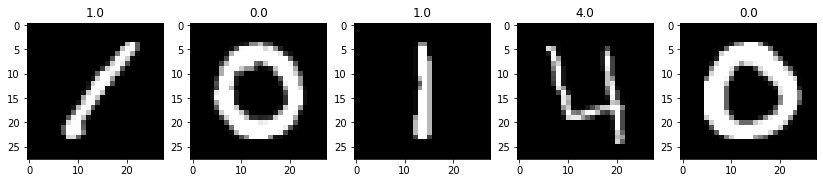

In [45]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);

## Разделяем на тест/трейн и скалируем

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
X_scaled = scale(train[:, 1:])
x_train, x_test, y_train, y_test = train_test_split(X_scaled, train_label, test_size=0.2, random_state=42)

## Сделаем PCA преобразование на  150 компонент

In [54]:
n_components = 150

In [55]:
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True)
pca.fit(x_train)
X_train_pca = pca.transform(x_train)
X_test_pca = pca.transform(x_test)

In [56]:
svc =SVC(gamma='auto', kernel='linear', class_weight='balanced')
svc.fit(X_train_pca, y_train)

SVC(class_weight='balanced', gamma='auto', kernel='linear')

In [57]:
y_pred = svc.predict(X_test_pca)

## Посмотрим на accuracy

In [58]:
from sklearn import metrics
print(metrics.accuracy_score(y_true=y_test, y_pred=y_pred))

0.9353571428571429


## Получим значения на тесте

In [59]:
submission=svc.predict(pca.transform(scale(test)))

## Визуализируем

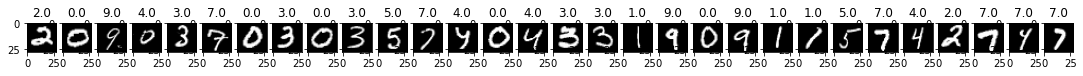

In [60]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(test_img[0:30], 1):
    subplot = fig.add_subplot(1, 32, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % submission[i - 1]);

### В принипе похоже

## Готовим файл для отправки

In [68]:
with open('submit.csv', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(submission.astype(int), 1):
        dst.write('%s,%s\n' % (i, p))